In [1]:
def plot_cat_var(labels, sizes, title, num_values):
    
    #distribution_size = data[column].shape[0]
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
        
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_ylabel('count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.figure(figsize=(20,10))
    #plt.savefig(title)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(500000, 22)

In [4]:
data = data[]

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [5]:
column_num_missing_vals = [(column,data[column].isna().sum()) for column in data.columns if data[column].isna().sum() > 0]
columns = [i[0] for i in column_num_missing_vals]
num_missing = [i[1] for i in column_num_missing_vals]

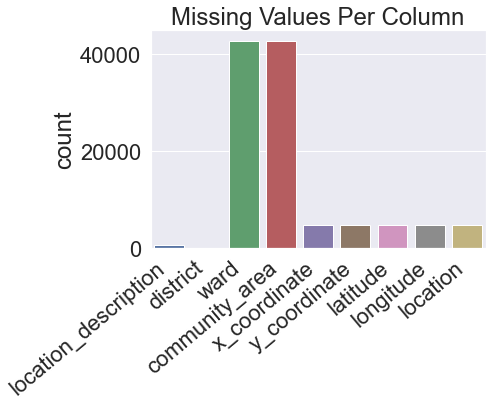

<Figure size 1440x720 with 0 Axes>

In [6]:
plot_cat_var(columns, num_missing, 'Missing Values Per Column', len(columns))


In [7]:
data.dtypes

unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                float64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [ ]:
# convert to category first, then string

In [19]:
data.district = data.district.astype('object')
data.beat = data.beat.astype('object')
data.ward = data.ward.astype('object')
data.community_area = data.community_area.astype('object')

In [20]:
data.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                     object
district                 object
ward                     object
community_area           object
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [9]:
def fill(val, fill_in):
    
    if pd.isnull(val):
        return fill_in
    else:
        return val

In [10]:
data.location_description.value_counts()

STREET                      130126
RESIDENCE                    84869
APARTMENT                    53335
SIDEWALK                     48513
OTHER                        18748
                             ...  
VESTIBULE                        1
RAILROAD PROPERTY                1
SCHOOL - PRIVATE GROUNDS         1
HOSPITAL                         1
CHA LOBBY                        1
Name: location_description, Length: 166, dtype: int64

In [11]:
data['location_description'] = data['location_description'].apply(fill, fill_in='STREET')

In [12]:
data['district'] = data['district'].apply(fill, fill_in=8.0)

In [13]:
data.district.value_counts()

8.0     33517
11.0    32001
7.0     29555
6.0     29256
25.0    28644
4.0     28277
3.0     25476
9.0     24695
12.0    24339
2.0     23764
19.0    22460
5.0     22234
18.0    22009
15.0    21633
10.0    21411
1.0     19911
14.0    19802
16.0    16537
22.0    16465
24.0    14800
17.0    14469
20.0     8731
31.0       13
21.0        1
Name: district, dtype: int64

In [14]:
district_8 = data.groupby('district').get_group(8.0)

In [15]:
district_8_wards = dict()
district_8_wards[15.0] = 1000

In [16]:
counts = list(data.ward.value_counts())
wards = list(data.ward.value_counts().index)
print(len(counts))
print(len(wards))
for i in range(0, len(counts)):
    print(f"Ward Name: {wards[i]} Percentage: {100*round(float(counts[i]/data.shape[0]),2)}%")
#plot_cat_var(data.ward.index, counts, 'Ward Frequency', len(data.ward.index))

50
50
Ward Name: 28.0 Percentage: 4.0%
Ward Name: 42.0 Percentage: 4.0%
Ward Name: 24.0 Percentage: 4.0%
Ward Name: 2.0 Percentage: 3.0%
Ward Name: 27.0 Percentage: 3.0%
Ward Name: 17.0 Percentage: 3.0%
Ward Name: 20.0 Percentage: 3.0%
Ward Name: 6.0 Percentage: 3.0%
Ward Name: 21.0 Percentage: 3.0%
Ward Name: 3.0 Percentage: 3.0%
Ward Name: 16.0 Percentage: 3.0%
Ward Name: 34.0 Percentage: 3.0%
Ward Name: 8.0 Percentage: 2.0%
Ward Name: 37.0 Percentage: 2.0%
Ward Name: 7.0 Percentage: 2.0%
Ward Name: 15.0 Percentage: 2.0%
Ward Name: 9.0 Percentage: 2.0%
Ward Name: 5.0 Percentage: 2.0%
Ward Name: 29.0 Percentage: 2.0%
Ward Name: 1.0 Percentage: 2.0%
Ward Name: 4.0 Percentage: 2.0%
Ward Name: 26.0 Percentage: 2.0%
Ward Name: 32.0 Percentage: 2.0%
Ward Name: 10.0 Percentage: 2.0%
Ward Name: 18.0 Percentage: 2.0%
Ward Name: 49.0 Percentage: 1.0%
Ward Name: 25.0 Percentage: 1.0%
Ward Name: 44.0 Percentage: 1.0%
Ward Name: 31.0 Percentage: 1.0%
Ward Name: 30.0 Percentage: 1.0%
Ward Name: 11

In [17]:
import random

In [18]:
x = list(data.ward)

for i in range(0, len(x)):
    if pd.isnull(x[i]):
        r = random.randint(0,2)
        if r == 0:
            x[i] = 28.0
        elif r == 1:
            x[i] = 42.0
        else:
            x[i] = 24.0
            
data['ward'] = x

In [19]:
counts = list(data.community_area.value_counts())
values = list(data.community_area.value_counts().index)
print(len(counts))
print(len(values))
for i in range(0, len(counts)):
    print(f"Value Name: {values[i]} Percentage: {100*round(float(counts[i]/data.shape[0]),2)}%")
#plot_cat_var(data.ward.index, counts, 'Ward Frequency', len(data.ward.index))

77
77
Value Name: 25.0 Percentage: 6.0%
Value Name: 8.0 Percentage: 3.0%
Value Name: 43.0 Percentage: 3.0%
Value Name: 23.0 Percentage: 3.0%
Value Name: 24.0 Percentage: 3.0%
Value Name: 67.0 Percentage: 3.0%
Value Name: 28.0 Percentage: 3.0%
Value Name: 71.0 Percentage: 3.0%
Value Name: 29.0 Percentage: 3.0%
Value Name: 68.0 Percentage: 2.0%
Value Name: 49.0 Percentage: 2.0%
Value Name: 69.0 Percentage: 2.0%
Value Name: 32.0 Percentage: 2.0%
Value Name: 66.0 Percentage: 2.0%
Value Name: 44.0 Percentage: 2.0%
Value Name: 22.0 Percentage: 2.0%
Value Name: 61.0 Percentage: 2.0%
Value Name: 6.0 Percentage: 2.0%
Value Name: 26.0 Percentage: 2.0%
Value Name: 27.0 Percentage: 2.0%
Value Name: 46.0 Percentage: 2.0%
Value Name: 19.0 Percentage: 2.0%
Value Name: 53.0 Percentage: 2.0%
Value Name: 30.0 Percentage: 2.0%
Value Name: 42.0 Percentage: 1.0%
Value Name: 7.0 Percentage: 1.0%
Value Name: 1.0 Percentage: 1.0%
Value Name: 3.0 Percentage: 1.0%
Value Name: 38.0 Percentage: 1.0%
Value Name: 1

In [20]:
data['community_area'] = data['community_area'].apply(fill, fill_in=25.0)

In [21]:
data.community_area.value_counts()[25.0]

71506

In [22]:
data.isna().sum()

unique_key                 0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description       0
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             0
fbi_code                   0
x_coordinate            4749
y_coordinate            4749
year                       0
updated_on                 0
latitude                4749
longitude               4749
location                4749
dtype: int64

In [23]:
data.to_csv('data.csv',index=False)

In [24]:
data.community_area.value_counts()

25.0    71506
8.0     15666
43.0    14910
23.0    14326
24.0    13578
        ...  
36.0     1064
55.0      984
12.0      798
47.0      631
9.0       419
Name: community_area, Length: 77, dtype: int64

In [25]:
28.0 Percentage: 4.0%
Ward Name: 42.0 Percentage: 4.0%
Ward Name: 24.0 Percentage: 4.0%

SyntaxError: invalid syntax (<ipython-input-25-dd912cbccb0b>, line 1)

In [ ]:
'''
Every police ward is going to be in a 
'''
#district_8.ward.value_counts()

In [ ]:
district_4.ward.value_counts()

In [ ]:
dat

In [ ]:
data.ward.value_counts()

In [ ]:
data.ward.isna().sum()

In [26]:
x = list(data.ward)
for i in range(0, len(x)):
    if pd.isnull(x[i]):
        r = random.randint(0,7)
        if r == 0 or r == 1:
            x[i] = 8.0
        elif r == 2 or r == 3:
            x[i] = 11.0
        elif r == 4:
            x[i] = 7.0
        elif r == 5:
            x[i] = 6.0
        elif r == 6:
            x[i] = 25.0
        else:
            x[i] = 4.0

In [ ]:
data.district.value_counts()

In [ ]:
import random

In [27]:
data.district.isna().sum()

0

In [ ]:
data.location_description.isna().sum()

In [ ]:
data.year.value_counts()

In [28]:
data.isna().sum()

unique_key                 0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description       0
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             0
fbi_code                   0
x_coordinate            4749
y_coordinate            4749
year                       0
updated_on                 0
latitude                4749
longitude               4749
location                4749
dtype: int64

In [29]:
data.to_csv('data.csv', index=False)

In [ ]:
data.district = [str(int(district)) for district in data.district]
data.beat = [str(int(beat)) for beat in data.beat]
data.community_area = [str(int(community_area)) for community_area in data.community_area]
data.ward = [str(int(ward)) for ward in data.ward]

#str(int(data.district[0]))